In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import random_split
import time

In [ ]:
start = "\033[1m"
end = "\033[0;0m"

**B2 Supervised Learning**

**B2. a.**

In [ ]:
batchSize=4
torch.manual_seed(1745967)

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,),)])
#Load the training data
trainset = datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchSize,
                                          shuffle=True, num_workers=2)
#Load the test data
testset = datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchSize, 
                                         shuffle=False, num_workers=2)

print('Training set size:', len(trainset))
print('Test set size:',len(testset))

Training set size: 60000
Test set size: 10000


In [ ]:
#train_reshape = trainset.reshape(60000,28*28)
Xtrain, ytrain = trainset.data, trainset.targets
Xtrain_reshape = Xtrain.reshape(60000,28*28)
Xtest, ytest = testset.data, testset.targets
Xtest_reshape = Xtest.reshape(10000,28*28)


In [ ]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


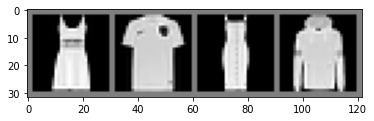

Dress T-shirt/top Dress Pullover


In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize back to range [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #rearrange dimensions to numpy format for disply
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next() #Get one batch (4 here)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batchSize)))

**B2. b.**

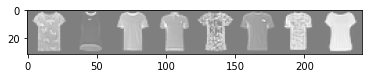

T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top T-shirt/top


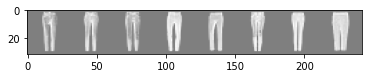

Trouser Trouser Trouser Trouser Trouser Trouser Trouser Trouser


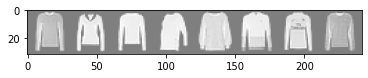

Pullover Pullover Pullover Pullover Pullover Pullover Pullover Pullover


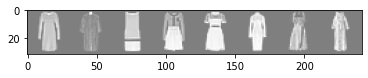

Dress Dress Dress Dress Dress Dress Dress Dress


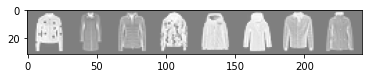

 Coat  Coat  Coat  Coat  Coat  Coat  Coat  Coat


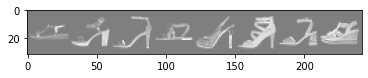

Sandal Sandal Sandal Sandal Sandal Sandal Sandal Sandal


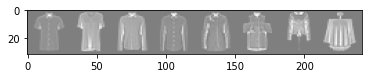

Shirt Shirt Shirt Shirt Shirt Shirt Shirt Shirt


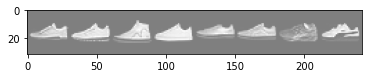

Sneaker Sneaker Sneaker Sneaker Sneaker Sneaker Sneaker Sneaker


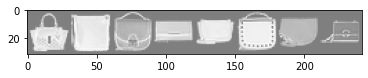

  Bag   Bag   Bag   Bag   Bag   Bag   Bag   Bag


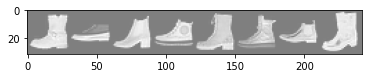

Ankle Boot Ankle Boot Ankle Boot Ankle Boot Ankle Boot Ankle Boot Ankle Boot Ankle Boot


In [ ]:

for i in range(len(classes)):
  dataset = torchvision.datasets.FashionMNIST(root='./data', train = True, download = True, transform = transforms.ToTensor())  
  trainloader2 = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, num_workers=2)

  idx = (dataset.targets==i) 
  dataset.targets = dataset.targets[idx]
  dataset.data = dataset.data[idx]
  dataiter = iter(trainloader2)
  images, labels = dataiter.next()
  imshow(torchvision.utils.make_grid(images))
  print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


***B2.3 Logistic regression***

**B 2.3 a)**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='none', 
                        solver='lbfgs',
                        max_iter=100,
                        C=50)
clf

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
start_time = time.time()
clf.fit(Xtrain_reshape,ytrain)
time_clf = round(time.time()-start_time, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predictions = clf.predict(Xtest_reshape)
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
accuracy_train_a = clf.score(Xtrain_reshape, ytrain)


In [ ]:
accuracy_test_a = clf.score(Xtest_reshape, ytest)


In [ ]:
print(start + "M1 "+ end + "Training accuracy: ", accuracy_train_a)
print(start + "M2 "+ end +"Testing accuracy: ", accuracy_test_a)
print(start + "M3 "+ end +"Training time:", time_clf, "s" )
lp_clf=6
print(start + "M4 "+ end +"Learnable Parameters:",lp_clf)

M1 Training accuracy:  0.86355
M2 Testing accuracy:  0.8405
M3 Training time: 44.087 s
M4 Learnable Parameters: 6


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, predictions) 

array([[809,   5,  17,  45,   9,   0, 100,   0,  15,   0],
       [  3, 958,   3,  27,   4,   0,   3,   0,   2,   0],
       [ 19,   6, 739,  15, 134,   1,  75,   0,  11,   0],
       [ 28,  14,  16, 858,  39,   1,  39,   0,   5,   0],
       [  0,   1, 111,  36, 773,   1,  70,   0,   8,   0],
       [  1,   0,   0,   1,   0, 888,   1,  56,   8,  45],
       [136,   2, 131,  41, 115,   0, 551,   0,  24,   0],
       [  0,   0,   0,   0,   0,  33,   0, 935,   0,  32],
       [  4,   1,   6,  11,   2,   3,  19,   5, 948,   1],
       [  0,   0,   0,   0,   0,  13,   0,  38,   3, 946]])

**B 2.3 b) L1 regularisation **

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', 
                        solver='saga',
                        max_iter=100,
                        C=50)

start_time = time.time()
clf2.fit(Xtrain_reshape,ytrain)
time_clf2 = round(time.time()-start_time, 3)
print(start + "M3 "+ end +"Training time:", time_clf2, "s" )
lp_clf2=6
print(start + "M4 "+ end +"Learnable Parameters:",lp_clf2)

predictions_b = clf2.predict(Xtest_reshape)

accuracy_train_b = clf2.score(Xtrain_reshape, ytrain)
print(start + "M1 "+ end +"Training accuracy: ", accuracy_train_b)
accuracy_test_b = clf2.score(Xtest_reshape, ytest)
print(start + "M2 "+ end +"Testing accuracy: ", accuracy_test_b)

confusion_matrix(ytest, predictions_b) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


M3 Training time: 437.281 s
M4 Learnable Parameters: 6
M1 Training accuracy:  0.8760833333333333
M2 Testing accuracy:  0.841


array([[797,   7,  12,  52,   7,   0, 113,   0,  12,   0],
       [  3, 959,   3,  27,   3,   0,   3,   0,   2,   0],
       [ 25,   6, 734,  10, 134,   1,  77,   1,  12,   0],
       [ 24,  21,  19, 851,  37,   0,  39,   0,   9,   0],
       [  1,   1, 107,  34, 778,   0,  72,   0,   7,   0],
       [  0,   0,   0,   1,   0, 906,   0,  50,   7,  36],
       [139,   1, 119,  38, 121,   0, 560,   0,  22,   0],
       [  0,   0,   0,   0,   0,  33,   0, 938,   0,  29],
       [  8,   1,  11,  13,   3,   3,  17,   6, 938,   0],
       [  0,   1,   0,   0,   0,  13,   1,  36,   0, 949]])

**B2.3 c) L2 regularisation**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', 
                        solver='lbfgs',
                        max_iter=100,
                        C=50)

start_time = time.time()
clf3.fit(Xtrain_reshape,ytrain)
time_clf3 = round(time.time()-start_time, 3)
print(start + "M3 "+ end +"Training time:", time_clf3, "s" )
lp_clf3=6
print(start + "M4 "+ end +"Learnable Parameters:",lp_clf3)

predictions_c = clf3.predict(Xtest_reshape)

accuracy_train_c = clf3.score(Xtrain_reshape, ytrain)
print(start + "M1 "+ end +"Training accuracy: ", accuracy_train_c)
accuracy_test_c = clf3.score(Xtest_reshape, ytest)
print(start + "M2 "+ end +"Testing accuracy: ", accuracy_test_c)

confusion_matrix(ytest, predictions_c) 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


M3 Training time: 48.344 s
M4 Learnable Parameters: 6
M1 Training accuracy:  0.8638666666666667
M2 Testing accuracy:  0.841


array([[800,   5,  17,  46,   9,   0, 108,   0,  15,   0],
       [  2, 956,   3,  29,   4,   0,   4,   0,   2,   0],
       [ 16,   6, 735,  14, 136,   1,  83,   0,   9,   0],
       [ 29,  13,  16, 859,  40,   1,  37,   0,   5,   0],
       [  0,   1, 111,  32, 776,   1,  71,   0,   8,   0],
       [  1,   0,   0,   1,   0, 892,   1,  54,   9,  42],
       [133,   1, 126,  41, 110,   0, 565,   0,  24,   0],
       [  0,   0,   0,   0,   0,  32,   0, 935,   0,  33],
       [  3,   1,   5,  11,   2,   3,  23,   5, 946,   1],
       [  0,   0,   0,   0,   0,  13,   0,  38,   3, 946]])

**B2.4 Convolutional Neural networks**

**B2.4 a. Convolution Neural netork : 2 Conv Layers 2 FC layers**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 5) #3: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 16, 5)
        #self.fc1 = nn.Linear(28*28, 100)
        self.fc1 = nn.Linear(16*4*4, 100)
        self.fc2 = nn.Linear(100, 50)
        #self.fc3 = nn.Linear(50, 20)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=0.03))
        #x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.leaky_relu(self.conv2(x),negative_slope=0.03))
        #print(x.shape)
        x = x.view(-1, 16*4*4)
        #x = x.view(-1, self.num_flat_features(x))         
        #x = F.relu(self.fc1(x))
        x = F.leaky_relu(self.fc1(x),negative_slope=0.03)
        #x = F.relu(self.fc2(x))
        #x = F.leaky_relu(self.fc2(x),negative_slope=0.03)
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

myCNN = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(myCNN.parameters(), lr=0.001, momentum=0.9)

In [ ]:
start_time = time.time()

max_epochs=2
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = myCNN(inputs)
        loss = criterion(outputs, labels)
        #print(loss.item()) # @Quiz 2 

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.4f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

time_cnn = round(time.time()-start_time, 3)
print(start + "M3 "+ end +"Training time:", time_cnn, "s" )
print('Finished Training!')

[1,  2000] loss: 1.0597
[1,  4000] loss: 0.6405
[1,  6000] loss: 0.5458
[1,  8000] loss: 0.5060
[1, 10000] loss: 0.4728
[1, 12000] loss: 0.4496
[1, 14000] loss: 0.4289
[2,  2000] loss: 0.3823
[2,  4000] loss: 0.3982
[2,  6000] loss: 0.3964
[2,  8000] loss: 0.3746
[2, 10000] loss: 0.3609
[2, 12000] loss: 0.3562
[2, 14000] loss: 0.3743
M3 Training time: 199.509 s
Finished Training!


In [ ]:
def count_parameters(model):
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        total_params+=param
    return total_params
    


In [ ]:
lp_cnn=count_parameters(myCNN)
print(start + "M4 "+ end + "Learning Parameters:", lp_cnn)

M4 Learning Parameters: 32470


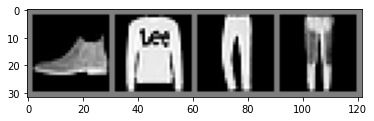

GroundTruth:  Ankle Boot Pullover Trouser Trouser


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batchSize)))

In [ ]:
outputs = myCNN(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batchSize)))

Predicted:  Ankle Boot Pullover Trouser Trouser


In [ ]:
correct = 0
total = 0

with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in trainloader:
        images, labels = data
        #labels_list.append(labels)
        outputs = myCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        #predictions_list.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_train_cnn = correct / total
print(start + "M1 "+ end +' Training Accuracy: %d %%' % (100 * correct / total))

M1  Training Accuracy: 86 %


In [ ]:
correct = 0
total = 0
labels_list=[]
predictions_list=[]

with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in testloader:
        images, labels = data
        labels_list.append(labels)
        outputs = myCNN(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions_list.append(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_test_cnn = correct / total
print(start + "M2 "+ end +' Testing Accuracy: %d %%' % (100 * correct / total))

M2  Testing Accuracy: 85 %


In [ ]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))
confusion_matrix(labels_l, predictions_l)

array([[701,   4,   7,  26,   4,   2, 250,   0,   6,   0],
       [  0, 979,   0,   9,   3,   0,   7,   0,   2,   0],
       [  5,   2, 674,   7,  77,   0, 234,   0,   1,   0],
       [ 14,  35,   5, 863,  14,   0,  67,   0,   2,   0],
       [  1,   1,  49,  44, 674,   0, 230,   0,   1,   0],
       [  0,   0,   0,   1,   0, 968,   0,  20,   0,  11],
       [ 84,   4,  37,  25,  36,   0, 807,   0,   7,   0],
       [  0,   0,   0,   0,   0,  15,   0, 944,   0,  41],
       [  2,   2,   1,   9,   6,   2,  25,   5, 948,   0],
       [  0,   0,   1,   0,   0,   6,   0,  31,   0, 962]])

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = myCNN(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 70 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 67 %
Accuracy of Dress : 86 %
Accuracy of  Coat : 67 %
Accuracy of Sandal : 96 %
Accuracy of Shirt : 80 %
Accuracy of Sneaker : 94 %
Accuracy of   Bag : 94 %
Accuracy of Ankle Boot : 96 %


**B 2.4 b. Convolution Neural network : 2 Conv layers 5 FC layers**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, 5) #3: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 16, 5)
        #self.fc1 = nn.Linear(28*28, 100)
        self.fc1 = nn.Linear(16*4*4, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 50)        
        self.fc4 = nn.Linear(50, 20)
        self.fc5 = nn.Linear(20, 10)

    def forward(self, x):
        #x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=0.03))
        #x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.leaky_relu(self.conv2(x),negative_slope=0.03))
        #print(x.shape)
        x = x.view(-1, 16*4*4)
        #x = x.view(-1, self.num_flat_features(x))         
        #x = F.relu(self.fc1(x))
        x = F.leaky_relu(self.fc1(x),negative_slope=0.03)
        #x = F.relu(self.fc2(x))
        x = F.leaky_relu(self.fc2(x),negative_slope=0.03)
        x = F.leaky_relu(self.fc3(x),negative_slope=0.03)
        x = F.leaky_relu(self.fc4(x),negative_slope=0.03)
        x = self.fc5(x)
        return x
    
    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

CNN2 = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN2.parameters(), lr=0.001, momentum=0.9)

In [ ]:
start_time = time.time()
max_epochs=2
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = CNN2(inputs)
        loss = criterion(outputs, labels)
        #print(loss.item()) # @Quiz 2 

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.4f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

time_cnn2 = round(time.time()-start_time, 3)
print(start + "M3 "+ end +"Training time:", time_cnn2, "s" )

print('Finished Training!')

[1,  2000] loss: 2.3030
[1,  4000] loss: 1.9336
[1,  6000] loss: 0.8804
[1,  8000] loss: 0.6847
[1, 10000] loss: 0.5880
[1, 12000] loss: 0.5493
[1, 14000] loss: 0.5190
[2,  2000] loss: 0.4713
[2,  4000] loss: 0.4287
[2,  6000] loss: 0.4353
[2,  8000] loss: 0.4295
[2, 10000] loss: 0.4012
[2, 12000] loss: 0.3831
[2, 14000] loss: 0.3733
M3 Training time: 213.378 s
Finished Training!


In [ ]:
lp_cnn2=count_parameters(CNN2)
print(start + "M4 "+ end +"Learning Parameters:",lp_cnn2)

M4 Learning Parameters: 79500


In [ ]:
correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in trainloader:
        images, labels = data
        outputs2 = CNN2(images)
        _, predicted2 = torch.max(outputs2.data, 1)
        total += labels.size(0)
        correct += (predicted2 == labels).sum().item()
accuracy_train_cnn2 = correct / total
print(start + "M1 "+ end +'Training Accuracy: %d %%' % (100 * correct / total))

M1 Training Accuracy: 87 %


In [ ]:
correct = 0
total = 0
labels_list=[]
predictions_list=[]

with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in testloader:
        images, labels = data
        labels_list.append(labels)
        outputs2 = CNN2(images)
        _, predicted2 = torch.max(outputs2.data, 1)
        predictions_list.append(predicted2)
        total += labels.size(0)
        correct += (predicted2 == labels).sum().item()
accuracy_test_cnn2 = correct / total
print(start + "M2 "+ end +'Testing Accuracy: %d %%' % (100 * correct / total))

M2 Testing Accuracy: 85 %


In [ ]:
predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))
confusion_matrix(labels_l, predictions_l)

array([[812,   1,  15,  41,   1,   1, 114,   0,  15,   0],
       [  2, 959,   2,  30,   2,   0,   3,   0,   2,   0],
       [ 16,   2, 775,  10,  91,   0, 101,   0,   5,   0],
       [ 19,   7,   5, 900,  15,   0,  50,   0,   4,   0],
       [  0,   1, 101,  66, 699,   0, 127,   0,   6,   0],
       [  1,   0,   0,   1,   0, 881,   0,  67,  12,  38],
       [166,   1,  95,  28,  61,   0, 626,   0,  23,   0],
       [  0,   0,   0,   0,   0,   4,   0, 971,   0,  25],
       [  2,   2,   2,   5,   1,   3,  11,   5, 969,   0],
       [  0,   0,   0,   0,   0,   1,   0,  52,   1, 946]])

**B 2.4 c. Convolution Neural network : 5 Conv layers 2 FC layers**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5) #3: #input channels; 6: #output channels; 5: kernel size
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.conv3 = nn.Conv2d(20, 40, 4)
        self.conv4 = nn.Conv2d(40, 80, 4)
        self.conv5 = nn.Conv2d(80, 120, 4)
        self.fc1 = nn.Linear(120*2*2, 200)
        self.fc2 = nn.Linear(200, 10)


    def forward(self, x):
        #x = self.pool(F.leaky_relu(self.conv1(x), negative_slope=0.03))
        x = F.leaky_relu(self.conv1(x), negative_slope=0.03)
        #x = self.pool(F.leaky_relu(self.conv2(x),negative_slope=0.03))
        x = F.leaky_relu(self.conv2(x), negative_slope=0.03)
        #x = self.pool(F.leaky_relu(self.conv3(x),negative_slope=0.03))
        x = F.leaky_relu(self.conv3(x),negative_slope=0.03)
        x = self.pool(F.leaky_relu(self.conv4(x),negative_slope=0.03))
        x = self.pool(F.leaky_relu(self.conv5(x),negative_slope=0.03))
        #print(x.shape)
        x = x.view(-1, 120*2*2)
        x = F.leaky_relu(self.fc1(x),negative_slope=0.03)        
        x = F.leaky_relu(self.fc2(x),negative_slope=0.03)
        return x
    
    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

CNN3 = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNN3.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.AdamOptimizer(CNN3.parameters(), lr=0.001, momentum=0.9)
start_time = time.time()
max_epochs=2
for epoch in range(max_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = CNN3(inputs)
        loss = criterion(outputs, labels)
        #print(loss.item()) # @Quiz 2 

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.4f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

time_cnn3 = round(time.time()-start_time, 3)
print(start + "M3 "+ end +"Training time:", time_cnn3, "s" )
print('Finished Training!')

[1,  2000] loss: 2.3011
[1,  4000] loss: 1.3827
[1,  6000] loss: 0.7326
[1,  8000] loss: 0.6461
[1, 10000] loss: 0.6043
[1, 12000] loss: 0.5492
[1, 14000] loss: 0.5338
[2,  2000] loss: 0.4908
[2,  4000] loss: 0.4741
[2,  6000] loss: 0.4379
[2,  8000] loss: 0.4274
[2, 10000] loss: 0.4119
[2, 12000] loss: 0.3953
[2, 14000] loss: 0.3966
M3 Training time: 671.942 s
Finished Training!


In [ ]:
lp_cnn3=count_parameters(CNN3)
print(start + "M3 "+ end + "Learning Parameters:",lp_cnn3)

M3 Learning Parameters: 321330


In [ ]:
correct = 0
total = 0
with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in trainloader:
        images, labels = data
        outputs3 = CNN3(images)
        _, predicted3 = torch.max(outputs3.data, 1)
        total += labels.size(0)
        correct += (predicted3 == labels).sum().item()
accuracy_train_cnn3 = correct / total
print(start + "M1 "+ end +'Training Accuracy: %d %%' % (100 * correct / total))

M1 Training Accuracy: 86 %


In [ ]:
correct = 0
total = 0
labels_list=[]
predictions_list=[]

with torch.no_grad():  #testing phase, no need to compute the gradients to save time
    for data in testloader:
        images, labels = data
        labels_list.append(labels)
        outputs3 = CNN3(images)
        _, predicted3 = torch.max(outputs3.data, 1)
        predictions_list.append(predicted3)
        total += labels.size(0)
        correct += (predicted3 == labels).sum().item()
accuracy_test_cnn3 = correct / total
print(start + "M2 "+ end +'Testing Accuracy: %d %%' % (100 * correct / total))

M2 Testing Accuracy: 85 %


In [ ]:
predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))
confusion_matrix(labels_l, predictions_l)

array([[845,   1,  28,  13,   4,   1,  98,   0,  10,   0],
       [  5, 974,   0,  14,   1,   0,   6,   0,   0,   0],
       [ 15,   1, 891,  10,  38,   1,  44,   0,   0,   0],
       [ 52,   6,  18, 884,  14,   0,  22,   0,   3,   1],
       [  0,   2, 208,  66, 657,   0,  66,   0,   1,   0],
       [  1,   0,   0,   0,   0, 875,   0,  90,   0,  34],
       [207,   3, 128,  22,  84,   0, 543,   0,  13,   0],
       [  0,   0,   0,   0,   0,   6,   0, 974,   0,  20],
       [  4,   1,   8,   2,   3,   1,  13,   7, 961,   0],
       [  0,   0,   0,   0,   0,   3,   0,  47,   0, 950]])

**B2.4 Performance comparison**

**B2.4 a.**

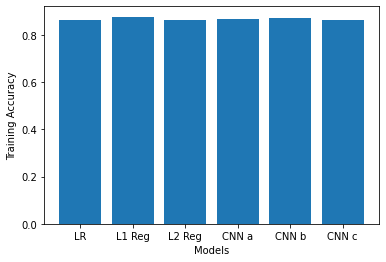

In [ ]:
x = ["LR", "L1 Reg", "L2 Reg", "CNN a", "CNN b", "CNN c"]
y= [accuracy_train_a, accuracy_train_b, accuracy_train_c,accuracy_train_cnn3,accuracy_train_cnn2,accuracy_train_cnn]

plt.ylabel('Training Accuracy')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()

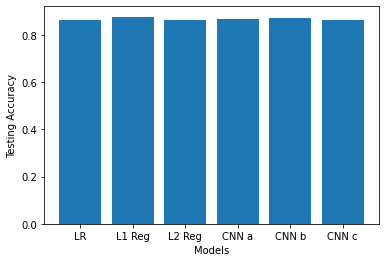

In [ ]:
y= [accuracy_train_a, accuracy_train_b, accuracy_train_c,accuracy_train_cnn3,accuracy_train_cnn2,accuracy_train_cnn]

plt.ylabel('Testing Accuracy')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()


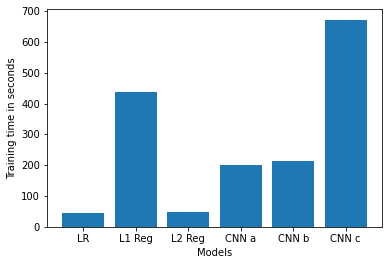

In [ ]:
y= [time_clf,time_clf2,time_clf3,time_cnn,time_cnn2,time_cnn3,]

plt.ylabel('Training time in seconds')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()


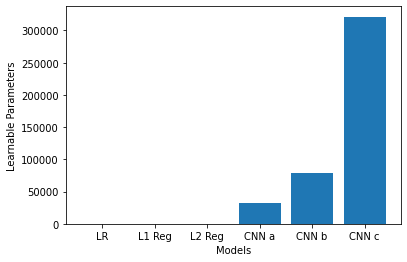

In [ ]:
y= [lp_clf,lp_clf2,lp_clf3,lp_cnn,lp_cnn2,lp_cnn3,]

plt.ylabel('Learnable Parameters')
plt.xlabel('Models')
plt.bar(x,y)
plt.show()

**B2.4 b.**

CNN with five Conv layer and 2 FC layers has taken the longest time for training when compared to others. By increasing the layers more features can be extracted but it increases the number of weights of the network and thus the complexity.




**B3. Unsupervised learning**

In [ ]:
dataset_full = torchvision.datasets.FashionMNIST(root='./data', train = True, download = True, transform = transforms.ToTensor())
idx = (dataset_full.targets==0) | (dataset_full.targets==1)
dataset_full.targets = dataset_full.targets[idx]
dataset_full.data = dataset_full.data[idx]
len(dataset_full)


12000

In [ ]:
dataset_full = list(dataset_full)

**B3.1 a.**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
X = np.array(dataset_full[:][0][0].numpy()).reshape(1, 28*28)
for i in range(1, len(dataset_full[:])):
    X = np.append(X,np.array(dataset_full[:][i][0].numpy()).reshape(1, 28*28),axis = 0)
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.95)
pca.fit(X)
cov_matrix = np.dot(X.T, X) / len(X)

for eigenvector in pca.components_[:24]:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

164.32323
109.77113
69.03932
26.820139
22.735857
19.907116
18.470781
17.43957
13.251908
12.440375
11.685006
9.109244
8.524587
7.6347985
7.349353
6.9168015
6.8260407
5.897608
5.3623824
5.2290163
5.011298
4.7312403
4.681342
4.458211


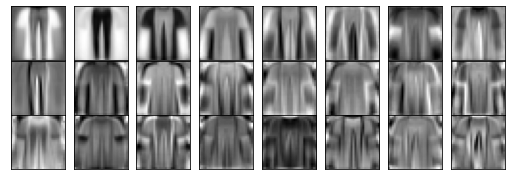

In [ ]:
#top 24 eigenvectors as images
ig, axes = plt.subplots(3,8,figsize=(9,3),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(pca.components_[i].reshape(28,28),cmap="gray")

**B3.1 b.**

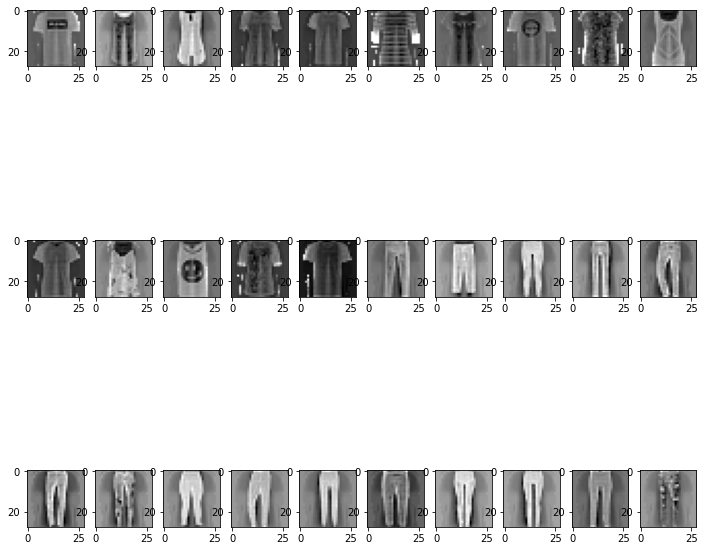

In [ ]:
from sklearn.metrics import mean_squared_error 

class0 = torchvision.datasets.FashionMNIST(root='./data', train = True, download = True, transform = transforms.ToTensor())
idx = (class0.targets==0)
class0.targets = class0.targets[idx]
class0.data = class0.data[idx]
#class0 = list(class0)[:15]

class1 = torchvision.datasets.FashionMNIST(root='./data', train = True, download = True, transform = transforms.ToTensor())
idx = (class1.targets==1)
class1.targets = class1.targets[idx]
class1.data = class1.data[idx]
#class1 = list(class1)[:15]

class_comb = list(class0)[:15] + list(class1)[:15]


Y = np.array(class_comb[:][0][0].numpy()).reshape(1, 28*28)
for i in range(1, len(class_comb[:])):
    Y = np.append(Y,np.array(class_comb[:][i][0].numpy()).reshape(1, 28*28),axis = 0)
Y = StandardScaler().fit_transform(Y)
components = pca.transform(Y)
#print(components.shape) 
#comp = pca.components_[:24]
projected = pca.inverse_transform(components)

# Show the original images
plt.figure('Original', figsize=(12, 12))
for i in range(1,31):
    plt.subplot(3, 10, i)
    plt.imshow(Y[i-1].reshape((28, 28)),cmap="gray")
plt.show()

 

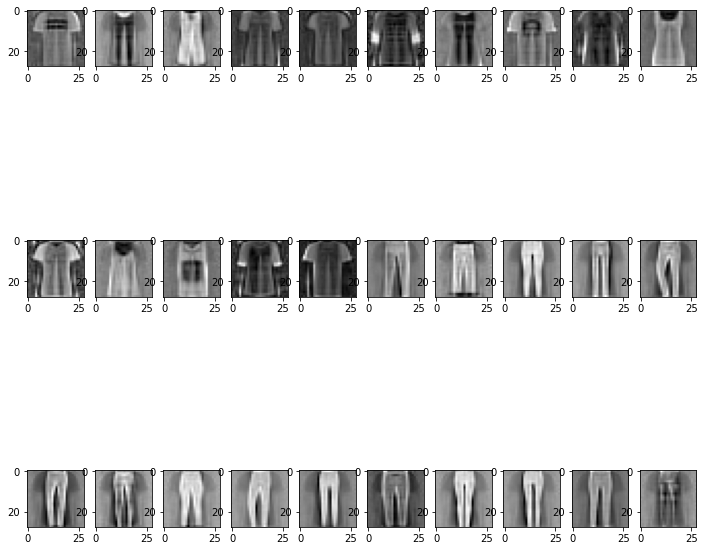

In [ ]:
# Show the reconstructed images
plt.figure('Reconstructed', figsize=(12, 12))
for i in range(1,31):
    plt.subplot(3, 10, i)
    plt.imshow(projected[i-1].reshape((28, 28)),cmap="gray")

plt.show() 



In [ ]:
print(start + "Mean squared error: " + end , mean_squared_error(Y,projected))

Mean squared error:  0.07731997


**B3.2 Autocencoder**

**B3.2 a.**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),
            nn.ReLU(),
            nn.Conv2d(64, 128, 1),
            nn.ReLU(),
            nn.Conv2d(128, 256, 1)
            
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
myAE=Autoencoder()

In [ ]:
#Training (optimisation) parameters
batch_size=128
learning_rate=1e-3
max_epochs = 20

list_epoch=[]
list_loss=[]

#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shuffling)
train_loader_auto = torch.utils.data.DataLoader(dataset_full, batch_size=batch_size, shuffle=True)
#Storage
outputs = []

#Start training
for epoch in range(max_epochs):
    for data in train_loader_auto:
        img, label = data
        #print(img.shape)
        optimizer.zero_grad()
        recon = myAE(img)
        #print(recon.shape)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()            
    if (epoch % 2) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon,float(loss)),)
    list_epoch.append(epoch+1)
    list_loss.append(float(loss))

Epoch:1, Loss:0.0401
Epoch:3, Loss:0.0251
Epoch:5, Loss:0.0198
Epoch:7, Loss:0.0185
Epoch:9, Loss:0.0179
Epoch:11, Loss:0.0137
Epoch:13, Loss:0.0150
Epoch:15, Loss:0.0141
Epoch:17, Loss:0.0167
Epoch:19, Loss:0.0136


Epoch: 1
Epoch: 10
Epoch: 19


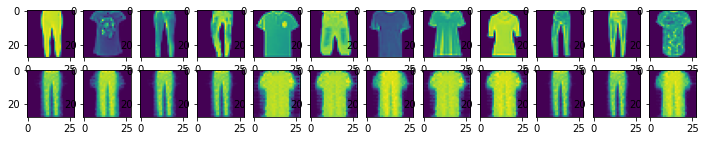

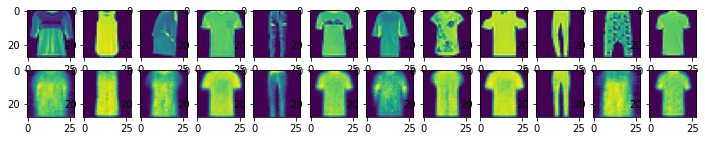

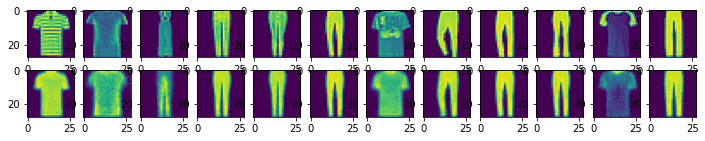

In [ ]:
numImgs=12;
for k in range(0, max_epochs, 9):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].detach().numpy()    
    recon = outputs[k][2].detach().numpy()
    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.imshow(item[0])

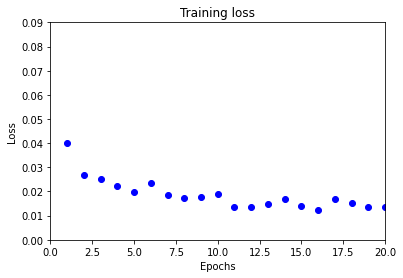

In [ ]:
plt.figure()
plt.plot(list_epoch, list_loss, 'bo', label='Training loss')
plt.axis([0, 20, 0, 0.09])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training loss')
plt.show()